In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler,LabelEncoder
le= LabelEncoder()
from sklearn.impute import SimpleImputer
import torch
from sklearn.model_selection import train_test_split

In [ ]:
train=pd.read_csv('cicids_18.csv')


In [ ]:
train.columns

Index(['Dst Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
      

In [ ]:
train["Label"].unique()

array(['Benign', 'Bot', nan], dtype=object)

In [ ]:
print(train["Label"].value_counts()[['Benign']].sum())
print(train["Label"].value_counts()[['Bot']].sum())

2307
28031


In [ ]:
train.drop(train.loc[train["Label"] == "Label"].index, inplace=True)

In [ ]:
train

Dst Port  Protocol            Timestamp  Flow Duration  Tot Fwd Pkts  \
0           443         6  02/03/2018 08:47:38         141385             9   
1         49684         6  02/03/2018 08:47:38            281             2   
2           443         6  02/03/2018 08:47:40         279824            11   
3           443         6  02/03/2018 08:47:40            132             2   
4           443         6  02/03/2018 08:47:41         274016             9   
...         ...       ...                  ...            ...           ...   
30334      8080         6  02/03/2018 03:39:25          14258             3   
30335      8080         6  02/03/2018 03:39:25            453             2   
30336      8080         6  02/03/2018 03:39:26          10985             3   
30337      8080         6  02/03/2018 03:39:26            448             2   
30338      8080         6  02/03/2018 03:39:26          11065             3   

       Tot Bwd Pkts  TotLen Fwd Pkts  TotLen Bwd Pkts  Fwd Pkt Len Max  \
0                 7              553             3773              202   
1                 1               38                0               38   
2                15             1086            10527              385   
3                 0                0                0                0   
4                13             1285             6141              517   
...             ...              ...              ...              ...   
30334             4              326              129              326   
30335             0                0                0                0   
30336             4              326              129              326   
30337             0                0                0                0   
30338             4              326              129              326   

       Fwd Pkt Len Min  ...  Fwd Seg Size Min  Active Mean  Active Std  \
0                    0  ...                20          0.0         0.0   
1                    0  ...                20          0.0         0.0   
2                    0  ...                20          0.0         0.0   
3                    0  ...                20          0.0         0.0   
4                    0  ...                20          0.0         0.0   
...                ...  ...               ...          ...         ...   
30334                0  ...                20          0.0         0.0   
30335                0  ...                20          0.0         0.0   
30336                0  ...                20          0.0         0.0   
30337                0  ...                20          0.0         0.0   
30338                0  ...                20          0.0         0.0   

       Active Max  Active Min  Idle Mean  Idle Std  Idle Max  Idle Min   Label  
0             0.0         0.0        0.0       0.0       0.0       0.0  Benign  
1             0.0         0.0        0.0       0.0       0.0       0.0  Benign  
2             0.0         0.0        0.0       0.0       0.0       0.0  Benign  
3             0.0         0.0        0.0       0.0       0.0       0.0  Benign  
4             0.0         0.0        0.0       0.0       0.0       0.0  Benign  
...           ...         ...        ...       ...       ...       ...     ...  
30334         0.0         0.0        0.0       0.0       0.0       0.0     Bot  
30335         0.0         0.0        0.0       0.0       0.0       0.0     Bot  
30336         0.0         0.0        0.0       0.0       0.0       0.0     Bot  
30337         0.0         0.0        0.0       0.0       0.0       0.0     Bot  
30338         NaN         NaN        NaN       NaN       NaN       NaN     NaN  

[30339 rows x 80 columns]

In [ ]:
train["Protocol"].unique()
# Forcing them to be strings
train = train.astype({"Protocol": str})
train["Protocol"].unique()
train = pd.get_dummies(train, columns=['Protocol'], drop_first=True)
train

Dst Port            Timestamp  Flow Duration  Tot Fwd Pkts  \
0           443  02/03/2018 08:47:38         141385             9   
1         49684  02/03/2018 08:47:38            281             2   
2           443  02/03/2018 08:47:40         279824            11   
3           443  02/03/2018 08:47:40            132             2   
4           443  02/03/2018 08:47:41         274016             9   
...         ...                  ...            ...           ...   
30334      8080  02/03/2018 03:39:25          14258             3   
30335      8080  02/03/2018 03:39:25            453             2   
30336      8080  02/03/2018 03:39:26          10985             3   
30337      8080  02/03/2018 03:39:26            448             2   
30338      8080  02/03/2018 03:39:26          11065             3   

       Tot Bwd Pkts  TotLen Fwd Pkts  TotLen Bwd Pkts  Fwd Pkt Len Max  \
0                 7              553             3773              202   
1                 1               38                0               38   
2                15             1086            10527              385   
3                 0                0                0                0   
4                13             1285             6141              517   
...             ...              ...              ...              ...   
30334             4              326              129              326   
30335             0                0                0                0   
30336             4              326              129              326   
30337             0                0                0                0   
30338             4              326              129              326   

       Fwd Pkt Len Min  Fwd Pkt Len Mean  ...  Active Std  Active Max  \
0                    0         61.444444  ...         0.0         0.0   
1                    0         19.000000  ...         0.0         0.0   
2                    0         98.727273  ...         0.0         0.0   
3                    0          0.000000  ...         0.0         0.0   
4                    0        142.777778  ...         0.0         0.0   
...                ...               ...  ...         ...         ...   
30334                0        108.666667  ...         0.0         0.0   
30335                0          0.000000  ...         0.0         0.0   
30336                0        108.666667  ...         0.0         0.0   
30337                0          0.000000  ...         0.0         0.0   
30338                0        108.666667  ...         0.0         NaN   

       Active Min  Idle Mean  Idle Std  Idle Max  Idle Min   Label  \
0             0.0        0.0       0.0       0.0       0.0  Benign   
1             0.0        0.0       0.0       0.0       0.0  Benign   
2             0.0        0.0       0.0       0.0       0.0  Benign   
3             0.0        0.0       0.0       0.0       0.0  Benign   
4             0.0        0.0       0.0       0.0       0.0  Benign   
...           ...        ...       ...       ...       ...     ...   
30334         0.0        0.0       0.0       0.0       0.0     Bot   
30335         0.0        0.0       0.0       0.0       0.0     Bot   
30336         0.0        0.0       0.0       0.0       0.0     Bot   
30337         0.0        0.0       0.0       0.0       0.0     Bot   
30338         NaN        NaN       NaN       NaN       NaN     NaN   

       Protocol_17  Protocol_6  
0            False        True  
1            False        True  
2            False        True  
3            False        True  
4            False        True  
...            ...         ...  
30334        False        True  
30335        False        True  
30336        False        True  
30337        False        True  
30338        False        True  

[30339 rows x 81 columns]

In [ ]:
columns_to_drop = [
    'Dst Port',
    'Timestamp',
    'Fwd PSH Flags',
    'Bwd PSH Flags',
    'Fwd URG Flags',
    'Bwd URG Flags',
    'Flow Byts/s',  # This field had np.inf values during training, as such was removed
    'Flow Pkts/s'  # This field had np.inf values during training, as such was removed
]

In [ ]:
train.drop(columns=columns_to_drop, inplace=True)
train

Flow Duration  Tot Fwd Pkts  Tot Bwd Pkts  TotLen Fwd Pkts  \
0             141385             9             7              553   
1                281             2             1               38   
2             279824            11            15             1086   
3                132             2             0                0   
4             274016             9            13             1285   
...              ...           ...           ...              ...   
30334          14258             3             4              326   
30335            453             2             0                0   
30336          10985             3             4              326   
30337            448             2             0                0   
30338          11065             3             4              326   

       TotLen Bwd Pkts  Fwd Pkt Len Max  Fwd Pkt Len Min  Fwd Pkt Len Mean  \
0                 3773              202                0         61.444444   
1                    0               38                0         19.000000   
2                10527              385                0         98.727273   
3                    0                0                0          0.000000   
4                 6141              517                0        142.777778   
...                ...              ...              ...               ...   
30334              129              326                0        108.666667   
30335                0                0                0          0.000000   
30336              129              326                0        108.666667   
30337                0                0                0          0.000000   
30338              129              326                0        108.666667   

       Fwd Pkt Len Std  Bwd Pkt Len Max  ...  Active Std  Active Max  \
0            87.534438             1460  ...         0.0         0.0   
1            26.870058                0  ...         0.0         0.0   
2           129.392497             1460  ...         0.0         0.0   
3             0.000000                0  ...         0.0         0.0   
4           183.887722             1460  ...         0.0         0.0   
...                ...              ...  ...         ...         ...   
30334       188.216188              112  ...         0.0         0.0   
30335         0.000000                0  ...         0.0         0.0   
30336       188.216188              112  ...         0.0         0.0   
30337         0.000000                0  ...         0.0         0.0   
30338       188.216188              112  ...         0.0         NaN   

       Active Min  Idle Mean  Idle Std  Idle Max  Idle Min   Label  \
0             0.0        0.0       0.0       0.0       0.0  Benign   
1             0.0        0.0       0.0       0.0       0.0  Benign   
2             0.0        0.0       0.0       0.0       0.0  Benign   
3             0.0        0.0       0.0       0.0       0.0  Benign   
4             0.0        0.0       0.0       0.0       0.0  Benign   
...           ...        ...       ...       ...       ...     ...   
30334         0.0        0.0       0.0       0.0       0.0     Bot   
30335         0.0        0.0       0.0       0.0       0.0     Bot   
30336         0.0        0.0       0.0       0.0       0.0     Bot   
30337         0.0        0.0       0.0       0.0       0.0     Bot   
30338         NaN        NaN       NaN       NaN       NaN     NaN   

       Protocol_17  Protocol_6  
0            False        True  
1            False        True  
2            False        True  
3            False        True  
4            False        True  
...            ...         ...  
30334        False        True  
30335        False        True  
30336        False        True  
30337        False        True  
30338        False        True  

[30339 rows x 73 columns]

In [ ]:
train.dropna(inplace=True)
train

Flow Duration  Tot Fwd Pkts  Tot Bwd Pkts  TotLen Fwd Pkts  \
0             141385             9             7              553   
1                281             2             1               38   
2             279824            11            15             1086   
3                132             2             0                0   
4             274016             9            13             1285   
...              ...           ...           ...              ...   
30333            459             2             0                0   
30334          14258             3             4              326   
30335            453             2             0                0   
30336          10985             3             4              326   
30337            448             2             0                0   

       TotLen Bwd Pkts  Fwd Pkt Len Max  Fwd Pkt Len Min  Fwd Pkt Len Mean  \
0                 3773              202                0         61.444444   
1                    0               38                0         19.000000   
2                10527              385                0         98.727273   
3                    0                0                0          0.000000   
4                 6141              517                0        142.777778   
...                ...              ...              ...               ...   
30333                0                0                0          0.000000   
30334              129              326                0        108.666667   
30335                0                0                0          0.000000   
30336              129              326                0        108.666667   
30337                0                0                0          0.000000   

       Fwd Pkt Len Std  Bwd Pkt Len Max  ...  Active Std  Active Max  \
0            87.534438             1460  ...         0.0         0.0   
1            26.870058                0  ...         0.0         0.0   
2           129.392497             1460  ...         0.0         0.0   
3             0.000000                0  ...         0.0         0.0   
4           183.887722             1460  ...         0.0         0.0   
...                ...              ...  ...         ...         ...   
30333         0.000000                0  ...         0.0         0.0   
30334       188.216188              112  ...         0.0         0.0   
30335         0.000000                0  ...         0.0         0.0   
30336       188.216188              112  ...         0.0         0.0   
30337         0.000000                0  ...         0.0         0.0   

       Active Min  Idle Mean  Idle Std  Idle Max  Idle Min   Label  \
0             0.0        0.0       0.0       0.0       0.0  Benign   
1             0.0        0.0       0.0       0.0       0.0  Benign   
2             0.0        0.0       0.0       0.0       0.0  Benign   
3             0.0        0.0       0.0       0.0       0.0  Benign   
4             0.0        0.0       0.0       0.0       0.0  Benign   
...           ...        ...       ...       ...       ...     ...   
30333         0.0        0.0       0.0       0.0       0.0     Bot   
30334         0.0        0.0       0.0       0.0       0.0     Bot   
30335         0.0        0.0       0.0       0.0       0.0     Bot   
30336         0.0        0.0       0.0       0.0       0.0     Bot   
30337         0.0        0.0       0.0       0.0       0.0     Bot   

       Protocol_17  Protocol_6  
0            False        True  
1            False        True  
2            False        True  
3            False        True  
4            False        True  
...            ...         ...  
30333        False        True  
30334        False        True  
30335        False        True  
30336        False        True  
30337        False        True  

[30338 rows x 73 columns]

In [ ]:
train.drop_duplicates(inplace=True)
train

Flow Duration  Tot Fwd Pkts  Tot Bwd Pkts  TotLen Fwd Pkts  \
0             141385             9             7              553   
1                281             2             1               38   
2             279824            11            15             1086   
3                132             2             0                0   
4             274016             9            13             1285   
...              ...           ...           ...              ...   
30328          32863             3             4              326   
30330          11317             3             4              326   
30332          11919             3             4              326   
30334          14258             3             4              326   
30336          10985             3             4              326   

       TotLen Bwd Pkts  Fwd Pkt Len Max  Fwd Pkt Len Min  Fwd Pkt Len Mean  \
0                 3773              202                0         61.444444   
1                    0               38                0         19.000000   
2                10527              385                0         98.727273   
3                    0                0                0          0.000000   
4                 6141              517                0        142.777778   
...                ...              ...              ...               ...   
30328              129              326                0        108.666667   
30330              129              326                0        108.666667   
30332              129              326                0        108.666667   
30334              129              326                0        108.666667   
30336              129              326                0        108.666667   

       Fwd Pkt Len Std  Bwd Pkt Len Max  ...  Active Std  Active Max  \
0            87.534438             1460  ...         0.0         0.0   
1            26.870058                0  ...         0.0         0.0   
2           129.392497             1460  ...         0.0         0.0   
3             0.000000                0  ...         0.0         0.0   
4           183.887722             1460  ...         0.0         0.0   
...                ...              ...  ...         ...         ...   
30328       188.216188              112  ...         0.0         0.0   
30330       188.216188              112  ...         0.0         0.0   
30332       188.216188              112  ...         0.0         0.0   
30334       188.216188              112  ...         0.0         0.0   
30336       188.216188              112  ...         0.0         0.0   

       Active Min  Idle Mean  Idle Std  Idle Max  Idle Min   Label  \
0             0.0        0.0       0.0       0.0       0.0  Benign   
1             0.0        0.0       0.0       0.0       0.0  Benign   
2             0.0        0.0       0.0       0.0       0.0  Benign   
3             0.0        0.0       0.0       0.0       0.0  Benign   
4             0.0        0.0       0.0       0.0       0.0  Benign   
...           ...        ...       ...       ...       ...     ...   
30328         0.0        0.0       0.0       0.0       0.0     Bot   
30330         0.0        0.0       0.0       0.0       0.0     Bot   
30332         0.0        0.0       0.0       0.0       0.0     Bot   
30334         0.0        0.0       0.0       0.0       0.0     Bot   
30336         0.0        0.0       0.0       0.0       0.0     Bot   

       Protocol_17  Protocol_6  
0            False        True  
1            False        True  
2            False        True  
3            False        True  
4            False        True  
...            ...         ...  
30328        False        True  
30330        False        True  
30332        False        True  
30334        False        True  
30336        False        True  

[16901 rows x 73 columns]

In [ ]:
print(train["Label"].value_counts()[['Benign']].sum())
print(train["Label"].value_counts()[['Bot']].sum())

2273
14628


In [ ]:
train.replace(to_replace="Benign", value=0, inplace=True)
train.replace(to_replace="Bot", value=1, inplace=True)
train

Flow Duration  Tot Fwd Pkts  Tot Bwd Pkts  TotLen Fwd Pkts  \
0             141385             9             7              553   
1                281             2             1               38   
2             279824            11            15             1086   
3                132             2             0                0   
4             274016             9            13             1285   
...              ...           ...           ...              ...   
30328          32863             3             4              326   
30330          11317             3             4              326   
30332          11919             3             4              326   
30334          14258             3             4              326   
30336          10985             3             4              326   

       TotLen Bwd Pkts  Fwd Pkt Len Max  Fwd Pkt Len Min  Fwd Pkt Len Mean  \
0                 3773              202                0         61.444444   
1                    0               38                0         19.000000   
2                10527              385                0         98.727273   
3                    0                0                0          0.000000   
4                 6141              517                0        142.777778   
...                ...              ...              ...               ...   
30328              129              326                0        108.666667   
30330              129              326                0        108.666667   
30332              129              326                0        108.666667   
30334              129              326                0        108.666667   
30336              129              326                0        108.666667   

       Fwd Pkt Len Std  Bwd Pkt Len Max  ...  Active Std  Active Max  \
0            87.534438             1460  ...         0.0         0.0   
1            26.870058                0  ...         0.0         0.0   
2           129.392497             1460  ...         0.0         0.0   
3             0.000000                0  ...         0.0         0.0   
4           183.887722             1460  ...         0.0         0.0   
...                ...              ...  ...         ...         ...   
30328       188.216188              112  ...         0.0         0.0   
30330       188.216188              112  ...         0.0         0.0   
30332       188.216188              112  ...         0.0         0.0   
30334       188.216188              112  ...         0.0         0.0   
30336       188.216188              112  ...         0.0         0.0   

       Active Min  Idle Mean  Idle Std  Idle Max  Idle Min  Label  \
0             0.0        0.0       0.0       0.0       0.0      0   
1             0.0        0.0       0.0       0.0       0.0      0   
2             0.0        0.0       0.0       0.0       0.0      0   
3             0.0        0.0       0.0       0.0       0.0      0   
4             0.0        0.0       0.0       0.0       0.0      0   
...           ...        ...       ...       ...       ...    ...   
30328         0.0        0.0       0.0       0.0       0.0      1   
30330         0.0        0.0       0.0       0.0       0.0      1   
30332         0.0        0.0       0.0       0.0       0.0      1   
30334         0.0        0.0       0.0       0.0       0.0      1   
30336         0.0        0.0       0.0       0.0       0.0      1   

       Protocol_17  Protocol_6  
0            False        True  
1            False        True  
2            False        True  
3            False        True  
4            False        True  
...            ...         ...  
30328        False        True  
30330        False        True  
30332        False        True  
30334        False        True  
30336        False        True  

[16901 rows x 73 columns]

In [ ]:
train.info

<bound method DataFrame.info of        Flow Duration  Tot Fwd Pkts  Tot Bwd Pkts  TotLen Fwd Pkts  \
0             141385             9             7              553   
1                281             2             1               38   
2             279824            11            15             1086   
3                132             2             0                0   
4             274016             9            13             1285   
...              ...           ...           ...              ...   
30328          32863             3             4              326   
30330          11317             3             4              326   
30332          11919             3             4              326   
30334          14258             3             4              326   
30336          10985             3             4              326   

       TotLen Bwd Pkts  Fwd Pkt Len Max  Fwd Pkt Len Min  Fwd Pkt Len Mean  \
0                 3773              202                0         61.444444   
1                    0               38                0         19.000000   
2                10527              385                0         98.727273   
3                    0                0                0          0.000000   
4                 6141              517                0        142.777778   
...                ...              ...              ...               ...   
30328              129              326                0        108.666667   
30330              129              326                0        108.666667   
30332              129              326                0        108.666667   
30334              129              326                0        108.666667   
30336              129              326                0        108.666667   

       Fwd Pkt Len Std  Bwd Pkt Len Max  ...  Active Std  Active Max  \
0            87.534438             1460  ...         0.0         0.0   
1            26.870058                0  ...         0.0         0.0   
2           129.392497             1460  ...         0.0         0.0   
3             0.000000                0  ...         0.0         0.0   
4           183.887722             1460  ...         0.0         0.0   
...                ...              ...  ...         ...         ...   
30328       188.216188              112  ...         0.0         0.0   
30330       188.216188              112  ...         0.0         0.0   
30332       188.216188              112  ...         0.0         0.0   
30334       188.216188              112  ...         0.0         0.0   
30336       188.216188              112  ...         0.0         0.0   

       Active Min  Idle Mean  Idle Std  Idle Max  Idle Min  Label  \
0             0.0        0.0       0.0       0.0       0.0      0   
1             0.0        0.0       0.0       0.0       0.0      0   
2             0.0        0.0       0.0       0.0       0.0      0   
3             0.0        0.0       0.0       0.0       0.0      0   
4             0.0        0.0       0.0       0.0       0.0      0   
...           ...        ...       ...       ...       ...    ...   
30328         0.0        0.0       0.0       0.0       0.0      1   
30330         0.0        0.0       0.0       0.0       0.0      1   
30332         0.0        0.0       0.0       0.0       0.0      1   
30334         0.0        0.0       0.0       0.0       0.0      1   
30336         0.0        0.0       0.0       0.0       0.0      1   

       Protocol_17  Protocol_6  
0            False        True  
1            False        True  
2            False        True  
3            False        True  
4            False        True  
...            ...         ...  
30328        False        True  
30330        False        True  
30332        False        True  
30334        False        True  
30336        False        True  

[16901 rows x 73 columns]>

In [ ]:
train = pd.DataFrame(train)
train.replace([np.inf, -np.inf], np.nan, inplace=True)

In [ ]:
train

Flow Duration  Tot Fwd Pkts  Tot Bwd Pkts  TotLen Fwd Pkts  \
0             141385             9             7              553   
1                281             2             1               38   
2             279824            11            15             1086   
3                132             2             0                0   
4             274016             9            13             1285   
...              ...           ...           ...              ...   
30328          32863             3             4              326   
30330          11317             3             4              326   
30332          11919             3             4              326   
30334          14258             3             4              326   
30336          10985             3             4              326   

       TotLen Bwd Pkts  Fwd Pkt Len Max  Fwd Pkt Len Min  Fwd Pkt Len Mean  \
0                 3773              202                0         61.444444   
1                    0               38                0         19.000000   
2                10527              385                0         98.727273   
3                    0                0                0          0.000000   
4                 6141              517                0        142.777778   
...                ...              ...              ...               ...   
30328              129              326                0        108.666667   
30330              129              326                0        108.666667   
30332              129              326                0        108.666667   
30334              129              326                0        108.666667   
30336              129              326                0        108.666667   

       Fwd Pkt Len Std  Bwd Pkt Len Max  ...  Active Std  Active Max  \
0            87.534438             1460  ...         0.0         0.0   
1            26.870058                0  ...         0.0         0.0   
2           129.392497             1460  ...         0.0         0.0   
3             0.000000                0  ...         0.0         0.0   
4           183.887722             1460  ...         0.0         0.0   
...                ...              ...  ...         ...         ...   
30328       188.216188              112  ...         0.0         0.0   
30330       188.216188              112  ...         0.0         0.0   
30332       188.216188              112  ...         0.0         0.0   
30334       188.216188              112  ...         0.0         0.0   
30336       188.216188              112  ...         0.0         0.0   

       Active Min  Idle Mean  Idle Std  Idle Max  Idle Min  Label  \
0             0.0        0.0       0.0       0.0       0.0      0   
1             0.0        0.0       0.0       0.0       0.0      0   
2             0.0        0.0       0.0       0.0       0.0      0   
3             0.0        0.0       0.0       0.0       0.0      0   
4             0.0        0.0       0.0       0.0       0.0      0   
...           ...        ...       ...       ...       ...    ...   
30328         0.0        0.0       0.0       0.0       0.0      1   
30330         0.0        0.0       0.0       0.0       0.0      1   
30332         0.0        0.0       0.0       0.0       0.0      1   
30334         0.0        0.0       0.0       0.0       0.0      1   
30336         0.0        0.0       0.0       0.0       0.0      1   

       Protocol_17  Protocol_6  
0            False        True  
1            False        True  
2            False        True  
3            False        True  
4            False        True  
...            ...         ...  
30328        False        True  
30330        False        True  
30332        False        True  
30334        False        True  
30336        False        True  

[16901 rows x 73 columns]

In [ ]:
train.columns

Index(['Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'TotLen Fwd Pkts',
       'TotLen Bwd Pkts', 'Fwd Pkt Len Max', 'Fwd Pkt Len Min',
       'Fwd Pkt Len Mean', 'Fwd Pkt Len Std', 'Bwd Pkt Len Max',
       'Bwd Pkt Len Min', 'Bwd Pkt Len Mean', 'Bwd Pkt Len Std',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Tot', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd Header Len', 'Bwd Header Len',
       'Fwd Pkts/s', 'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max',
       'Pkt Len Mean', 'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt',
       'SYN Flag Cnt', 'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt',
       'URG Flag Cnt', 'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio',
       'Pkt Size Avg', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg',
       'Fwd Byts/b Avg', 'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg',
       'Bwd Byts/b Avg', 'Bwd Pkts/b Avg', 'B

In [ ]:
train["Label"].value_counts()

Label
1    14628
0     2273
Name: count, dtype: int64

<Axes: >

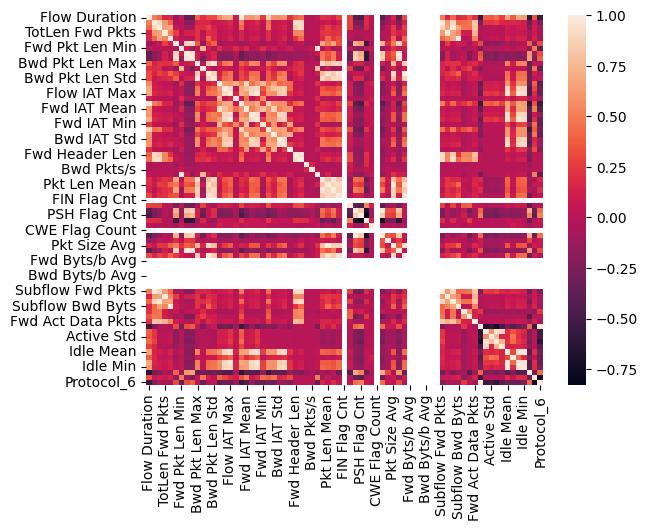

In [ ]:
import seaborn as sns
sns.heatmap(train.corr(numeric_only=True))

In [ ]:
X = train.drop(["Label"], axis=1)
# X = X[numeric_columns]

y =  train["Label"]

print(X.info())
print(y.info())

<class 'pandas.core.frame.DataFrame'>
Index: 16901 entries, 0 to 30336
Data columns (total 72 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Flow Duration      16901 non-null  int64  
 1   Tot Fwd Pkts       16901 non-null  int64  
 2   Tot Bwd Pkts       16901 non-null  int64  
 3   TotLen Fwd Pkts    16901 non-null  int64  
 4   TotLen Bwd Pkts    16901 non-null  int64  
 5   Fwd Pkt Len Max    16901 non-null  int64  
 6   Fwd Pkt Len Min    16901 non-null  int64  
 7   Fwd Pkt Len Mean   16901 non-null  float64
 8   Fwd Pkt Len Std    16901 non-null  float64
 9   Bwd Pkt Len Max    16901 non-null  int64  
 10  Bwd Pkt Len Min    16901 non-null  int64  
 11  Bwd Pkt Len Mean   16901 non-null  float64
 12  Bwd Pkt Len Std    16901 non-null  float64
 13  Flow IAT Mean      16901 non-null  float64
 14  Flow IAT Std       16901 non-null  float64
 15  Flow IAT Max       16901 non-null  float64
 16  Flow IAT Min       16901 no

In [ ]:
ss = StandardScaler()
X = ss.fit_transform(X)
le = LabelEncoder()
target_class = y.unique()
y = le.fit_transform( y )

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=38)

In [ ]:
train

Flow Duration  Tot Fwd Pkts  Tot Bwd Pkts  TotLen Fwd Pkts  \
0             141385             9             7              553   
1                281             2             1               38   
2             279824            11            15             1086   
3                132             2             0                0   
4             274016             9            13             1285   
...              ...           ...           ...              ...   
30328          32863             3             4              326   
30330          11317             3             4              326   
30332          11919             3             4              326   
30334          14258             3             4              326   
30336          10985             3             4              326   

       TotLen Bwd Pkts  Fwd Pkt Len Max  Fwd Pkt Len Min  Fwd Pkt Len Mean  \
0                 3773              202                0         61.444444   
1                    0               38                0         19.000000   
2                10527              385                0         98.727273   
3                    0                0                0          0.000000   
4                 6141              517                0        142.777778   
...                ...              ...              ...               ...   
30328              129              326                0        108.666667   
30330              129              326                0        108.666667   
30332              129              326                0        108.666667   
30334              129              326                0        108.666667   
30336              129              326                0        108.666667   

       Fwd Pkt Len Std  Bwd Pkt Len Max  ...  Active Std  Active Max  \
0            87.534438             1460  ...         0.0         0.0   
1            26.870058                0  ...         0.0         0.0   
2           129.392497             1460  ...         0.0         0.0   
3             0.000000                0  ...         0.0         0.0   
4           183.887722             1460  ...         0.0         0.0   
...                ...              ...  ...         ...         ...   
30328       188.216188              112  ...         0.0         0.0   
30330       188.216188              112  ...         0.0         0.0   
30332       188.216188              112  ...         0.0         0.0   
30334       188.216188              112  ...         0.0         0.0   
30336       188.216188              112  ...         0.0         0.0   

       Active Min  Idle Mean  Idle Std  Idle Max  Idle Min  Label  \
0             0.0        0.0       0.0       0.0       0.0      0   
1             0.0        0.0       0.0       0.0       0.0      0   
2             0.0        0.0       0.0       0.0       0.0      0   
3             0.0        0.0       0.0       0.0       0.0      0   
4             0.0        0.0       0.0       0.0       0.0      0   
...           ...        ...       ...       ...       ...    ...   
30328         0.0        0.0       0.0       0.0       0.0      1   
30330         0.0        0.0       0.0       0.0       0.0      1   
30332         0.0        0.0       0.0       0.0       0.0      1   
30334         0.0        0.0       0.0       0.0       0.0      1   
30336         0.0        0.0       0.0       0.0       0.0      1   

       Protocol_17  Protocol_6  
0            False        True  
1            False        True  
2            False        True  
3            False        True  
4            False        True  
...            ...         ...  
30328        False        True  
30330        False        True  
30332        False        True  
30334        False        True  
30336        False        True  

[16901 rows x 73 columns]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
original_columns= train.columns.tolist()
scaler = MinMaxScaler()
train_scaled_values= scaler.fit_transform(train)
train_scaled=pd.DataFrame(train_scaled_values,columns=original_columns)

In [ ]:
train_scaled.columns


Index(['Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'TotLen Fwd Pkts',
       'TotLen Bwd Pkts', 'Fwd Pkt Len Max', 'Fwd Pkt Len Min',
       'Fwd Pkt Len Mean', 'Fwd Pkt Len Std', 'Bwd Pkt Len Max',
       'Bwd Pkt Len Min', 'Bwd Pkt Len Mean', 'Bwd Pkt Len Std',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Tot', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd Header Len', 'Bwd Header Len',
       'Fwd Pkts/s', 'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max',
       'Pkt Len Mean', 'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt',
       'SYN Flag Cnt', 'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt',
       'URG Flag Cnt', 'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio',
       'Pkt Size Avg', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg',
       'Fwd Byts/b Avg', 'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg',
       'Bwd Byts/b Avg', 'Bwd Pkts/b Avg', 'B

In [ ]:
final_data = train_scaled.groupby('Label').apply(lambda x: x.sample(frac=0.1,random_state=38))
final_data.shape

(1690, 73)

In [ ]:
final_data.groupby(level='Label').size()

Label
0.0     227
1.0    1463
dtype: int64

In [ ]:
final_data

Flow Duration  Tot Fwd Pkts  Tot Bwd Pkts  TotLen Fwd Pkts  \
Label                                                                     
0.0   9542        0.001584      0.001575      0.000866         0.000000   
      9151        0.033107      0.007874      0.007792         0.009917   
      171         0.965334      0.014961      0.019048         0.006021   
      538         0.999750      0.034646      0.058874         0.041992   
      613         0.000002      0.001575      0.000000         0.000665   
...                    ...           ...           ...              ...   
1.0   6818        0.000146      0.000787      0.011255         0.000000   
      13427       0.000092      0.001575      0.003463         0.002816   
      2340        0.000079      0.001575      0.003463         0.002816   
      3863        0.000086      0.001575      0.003463         0.002816   
      12666       0.000089      0.001575      0.003463         0.002816   

             TotLen Bwd Pkts  Fwd Pkt Len Max  Fwd Pkt Len Min  \
Label                                                            
0.0   9542          0.000000         0.000000              0.0   
      9151          0.002568         0.399175              0.0   
      171           0.007684         0.196344              0.0   
      538           0.011929         0.533608              0.0   
      613           0.000000         0.027123              0.0   
...                      ...              ...              ...   
1.0   6818          0.000119         0.000000              0.0   
      13427         0.000119         0.192217              0.0   
      2340          0.000119         0.192217              0.0   
      3863          0.000119         0.192217              0.0   
      12666         0.000119         0.192217              0.0   

             Fwd Pkt Len Mean  Fwd Pkt Len Std  Bwd Pkt Len Max  ...  \
Label                                                            ...   
0.0   9542           0.000000         0.000000         0.000000  ...   
      9151           0.214446         0.239989         0.803425  ...   
      171            0.071610         0.102510         1.000000  ...   
      538            0.221963         0.203808         0.979452  ...   
      613            0.052740         0.027830         0.000000  ...   
...                       ...              ...              ...  ...   
1.0   6818           0.000000         0.000000         0.076712  ...   
      13427          0.223288         0.223288         0.076712  ...   
      2340           0.223288         0.223288         0.076712  ...   
      3863           0.223288         0.223288         0.076712  ...   
      12666          0.223288         0.223288         0.076712  ...   

             Active Std  Active Max  Active Min  Idle Mean  Idle Std  \
Label                                                                  
0.0   9542     0.000000    0.000000    0.000000   0.000000  0.000000   
      9151     0.000000    0.000000    0.000000   0.000000  0.000000   
      171      0.000186    0.000551    0.000122   0.081010  0.031849   
      538      0.010603    0.019807    0.001259   0.122689  0.017607   
      613      0.000000    0.000000    0.000000   0.000000  0.000000   
...                 ...         ...         ...        ...       ...   
1.0   6818     0.000000    0.000000    0.000000   0.000000  0.000000   
      13427    0.000000    0.000000    0.000000   0.000000  0.000000   
      2340     0.000000    0.000000    0.000000   0.000000  0.000000   
      3863     0.000000    0.000000    0.000000   0.000000  0.000000   
      12666    0.000000    0.000000    0.000000   0.000000  0.000000   

             Idle Max  Idle Min  Label  Protocol_17  Protocol_6  
Label                                                            
0.0   9542   0.000000  0.000000    0.0          0.0         1.0  
      9151   0.000000  0.000000    0.0          0.0         1.0  
      171    0.084034  0.047186    0.0  

In [ ]:
train

Flow Duration  Tot Fwd Pkts  Tot Bwd Pkts  TotLen Fwd Pkts  \
0             141385             9             7              553   
1                281             2             1               38   
2             279824            11            15             1086   
3                132             2             0                0   
4             274016             9            13             1285   
...              ...           ...           ...              ...   
30328          32863             3             4              326   
30330          11317             3             4              326   
30332          11919             3             4              326   
30334          14258             3             4              326   
30336          10985             3             4              326   

       TotLen Bwd Pkts  Fwd Pkt Len Max  Fwd Pkt Len Min  Fwd Pkt Len Mean  \
0                 3773              202                0         61.444444   
1                    0               38                0         19.000000   
2                10527              385                0         98.727273   
3                    0                0                0          0.000000   
4                 6141              517                0        142.777778   
...                ...              ...              ...               ...   
30328              129              326                0        108.666667   
30330              129              326                0        108.666667   
30332              129              326                0        108.666667   
30334              129              326                0        108.666667   
30336              129              326                0        108.666667   

       Fwd Pkt Len Std  Bwd Pkt Len Max  ...  Active Std  Active Max  \
0            87.534438             1460  ...         0.0         0.0   
1            26.870058                0  ...         0.0         0.0   
2           129.392497             1460  ...         0.0         0.0   
3             0.000000                0  ...         0.0         0.0   
4           183.887722             1460  ...         0.0         0.0   
...                ...              ...  ...         ...         ...   
30328       188.216188              112  ...         0.0         0.0   
30330       188.216188              112  ...         0.0         0.0   
30332       188.216188              112  ...         0.0         0.0   
30334       188.216188              112  ...         0.0         0.0   
30336       188.216188              112  ...         0.0         0.0   

       Active Min  Idle Mean  Idle Std  Idle Max  Idle Min  Label  \
0             0.0        0.0       0.0       0.0       0.0      0   
1             0.0        0.0       0.0       0.0       0.0      0   
2             0.0        0.0       0.0       0.0       0.0      0   
3             0.0        0.0       0.0       0.0       0.0      0   
4             0.0        0.0       0.0       0.0       0.0      0   
...           ...        ...       ...       ...       ...    ...   
30328         0.0        0.0       0.0       0.0       0.0      1   
30330         0.0        0.0       0.0       0.0       0.0      1   
30332         0.0        0.0       0.0       0.0       0.0      1   
30334         0.0        0.0       0.0       0.0       0.0      1   
30336         0.0        0.0       0.0       0.0       0.0      1   

       Protocol_17  Protocol_6  
0            False        True  
1            False        True  
2            False        True  
3            False        True  
4            False        True  
...            ...         ...  
30328        False        True  
30330        False        True  
30332        False        True  
30334        False        True  
30336        False        True  

[16901 rows x 73 columns]

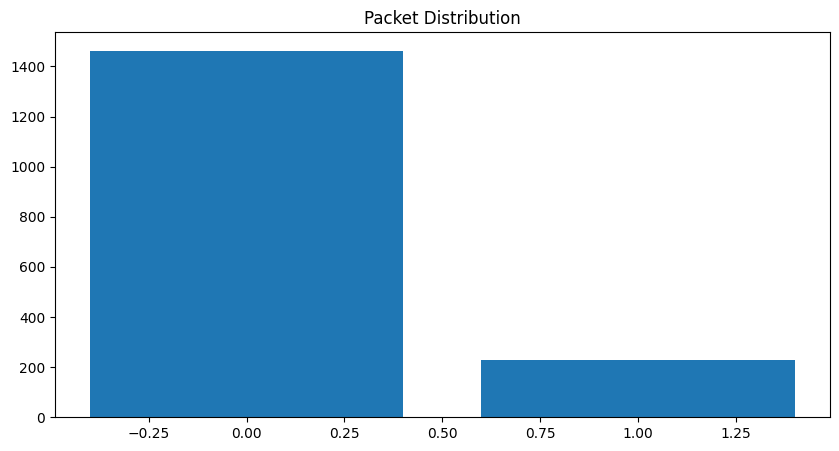

In [ ]:
import matplotlib.pyplot as plt
def visualizeBar(final_data):
    # bar chart of packets label
    plt.figure(figsize=(10, 5))
    plt.title('Packet Distribution')
    # plt.bar(x=['Benign', 'FTP-BruteForce', 'SSH-Bruteforce'], height=network_data['Label'].value_counts(), color=['blue', 'magenta', 'cyan'])
    plt.bar(x=final_data['Label'].unique(), height=final_data['Label'].value_counts())
    p = plt.gcf()
#%%time
# network_data = dropInfinateNull(network_data)
visualizeBar(final_data)

In [ ]:
final_data.head

<bound method NDFrame.head of              Flow Duration  Tot Fwd Pkts  Tot Bwd Pkts  TotLen Fwd Pkts  \
Label                                                                     
0.0   9542        0.001584      0.001575      0.000866         0.000000   
      9151        0.033107      0.007874      0.007792         0.009917   
      171         0.965334      0.014961      0.019048         0.006021   
      538         0.999750      0.034646      0.058874         0.041992   
      613         0.000002      0.001575      0.000000         0.000665   
...                    ...           ...           ...              ...   
1.0   6818        0.000146      0.000787      0.011255         0.000000   
      13427       0.000092      0.001575      0.003463         0.002816   
      2340        0.000079      0.001575      0.003463         0.002816   
      3863        0.000086      0.001575      0.003463         0.002816   
      12666       0.000089      0.001575      0.003463         0.002816   

             TotLen Bwd Pkts  Fwd Pkt Len Max  Fwd Pkt Len Min  \
Label                                                            
0.0   9542          0.000000         0.000000              0.0   
      9151          0.002568         0.399175              0.0   
      171           0.007684         0.196344              0.0   
      538           0.011929         0.533608              0.0   
      613           0.000000         0.027123              0.0   
...                      ...              ...              ...   
1.0   6818          0.000119         0.000000              0.0   
      13427         0.000119         0.192217              0.0   
      2340          0.000119         0.192217              0.0   
      3863          0.000119         0.192217              0.0   
      12666         0.000119         0.192217              0.0   

             Fwd Pkt Len Mean  Fwd Pkt Len Std  Bwd Pkt Len Max  ...  \
Label                                                            ...   
0.0   9542           0.000000         0.000000         0.000000  ...   
      9151           0.214446         0.239989         0.803425  ...   
      171            0.071610         0.102510         1.000000  ...   
      538            0.221963         0.203808         0.979452  ...   
      613            0.052740         0.027830         0.000000  ...   
...                       ...              ...              ...  ...   
1.0   6818           0.000000         0.000000         0.076712  ...   
      13427          0.223288         0.223288         0.076712  ...   
      2340           0.223288         0.223288         0.076712  ...   
      3863           0.223288         0.223288         0.076712  ...   
      12666          0.223288         0.223288         0.076712  ...   

             Active Std  Active Max  Active Min  Idle Mean  Idle Std  \
Label                                                                  
0.0   9542     0.000000    0.000000    0.000000   0.000000  0.000000   
      9151     0.000000    0.000000    0.000000   0.000000  0.000000   
      171      0.000186    0.000551    0.000122   0.081010  0.031849   
      538      0.010603    0.019807    0.001259   0.122689  0.017607   
      613      0.000000    0.000000    0.000000   0.000000  0.000000   
...                 ...         ...         ...        ...       ...   
1.0   6818     0.000000    0.000000    0.000000   0.000000  0.000000   
      13427    0.000000    0.000000    0.000000   0.000000  0.000000   
      2340     0.000000    0.000000    0.000000   0.000000  0.000000   
      3863     0.000000    0.000000    0.000000   0.000000  0.000000   
      12666    0.000000    0.000000    0.000000   0.000000  0.000000   

             Idle Max  Idle Min  Label  Protocol_17  Protocol_6  
Label                                                            
0.0   9542   0.000000  0.000000    0.0          0.0         1.0  
      9151   0.000000  0.000000    0.0          0.0         1.0

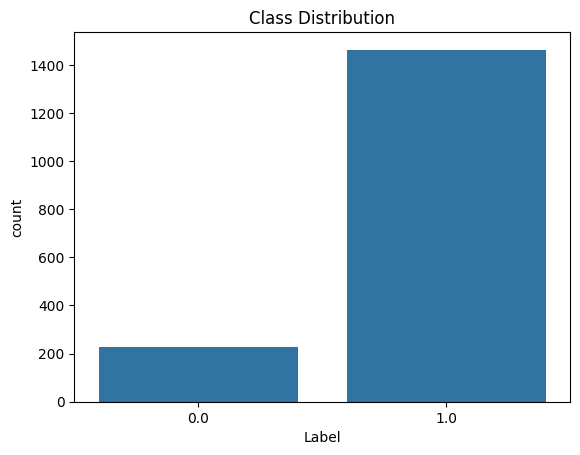

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Label',data=final_data)
plt.title('Class Distribution')
plt.show()



In [ ]:
pip install lime

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Instantiate the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=38)

# Fit the Random Forest classifier on the training data
rf_classifier.fit(X_train, y_train)
class_name_str = ['Benign', 'Bot']
# Select one of the decision trees from the Random Forest (e.g., the first one)
tree_idx = 0  # You can change this index to visualize a different tree
selected_tree = rf_classifier.estimators_[tree_idx]

# Visualize the selected decision tree
plt.figure(figsize=(20, 10))
plot_tree(selected_tree, feature_names=original_columns, class_names=class_name_str, filled=True, rounded=True)
plt.show()


In [ ]:

from lime import lime_tabular

# Instantiate the LIME explainer
rf_explainer = lime_tabular.LimeTabularExplainer(X_train,
                                                  feature_names=original_columns,
                                                  class_names=class_name_str,
                                                  mode='classification')

# Select a single instance from X_test for explanation (you can change this as needed)
instance_idx = 0
instance = X_test[instance_idx]

# Explain the prediction for the selected instance using Random Forest classifier
rf_explanation = rf_explainer.explain_instance(instance,
                                                rf_classifier.predict_proba,
                                                num_features=len(original_columns))

# Visualize the explanation
rf_explanation.show_in_notebook()


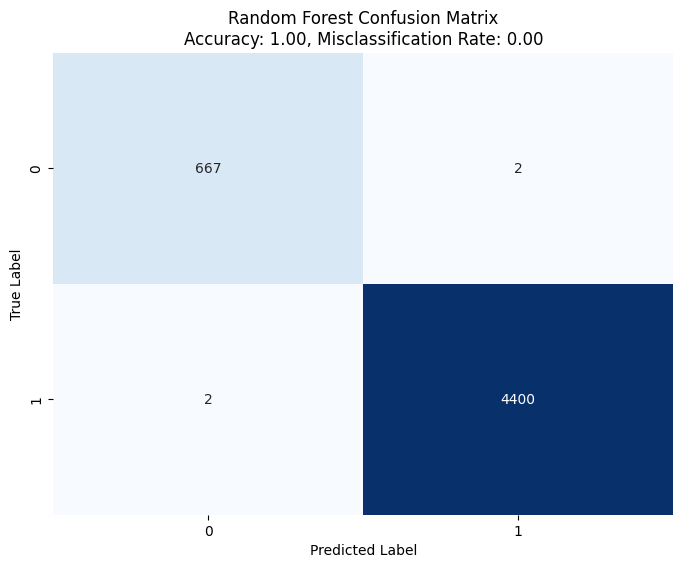

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Instantiate the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the Random Forest classifier on the training data
rf_classifier.fit(X_train, y_train)

# Predict labels for test set
y_pred_rf = rf_classifier.predict(X_test)

# Generate confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Calculate accuracy
accuracy_rf = np.sum(np.diag(conf_matrix_rf)) / np.sum(conf_matrix_rf)

# Calculate misclassification rate
misclassification_rate_rf = 1 - accuracy_rf

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Random Forest Confusion Matrix\nAccuracy: {:.2f}, Misclassification Rate: {:.2f}".format(accuracy_rf, misclassification_rate_rf))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


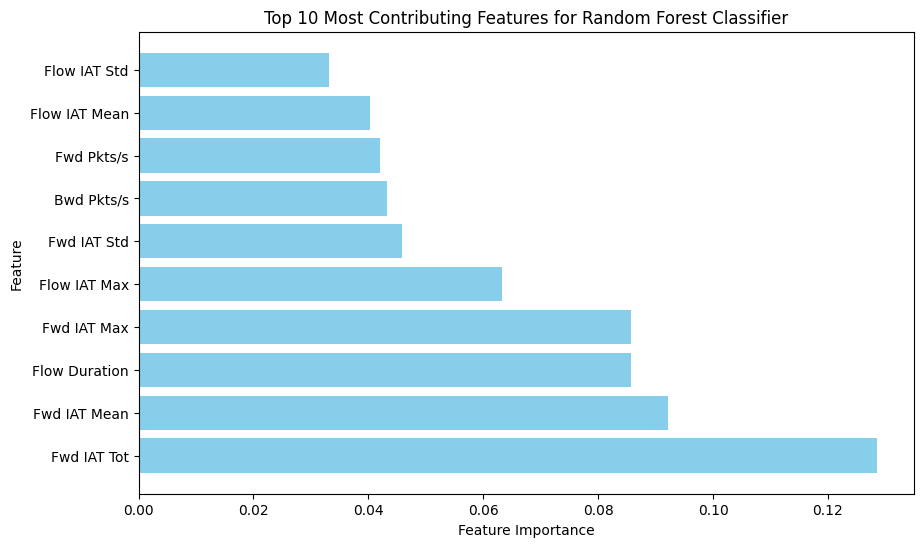

In [ ]:
# Get feature importances
feature_importances_rf = rf_classifier.feature_importances_

# Get the indices of the top 10 features
top10_indices_rf = np.argsort(feature_importances_rf)[-10:]

# Get the names of the top 10 most contributing features
top10_features_rf = [original_columns[i] for i in top10_indices_rf]

# Plot the feature contribution graph
plt.figure(figsize=(10, 6))
plt.barh(top10_features_rf, feature_importances_rf[top10_indices_rf], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 10 Most Contributing Features for Random Forest Classifier')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest feature importance on top
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import lime
from lime import lime_tabular

# Instantiate the Random Forest classifier with only the top 10 features
rf_classifier_top10 = RandomForestClassifier(random_state=42)

# Fit the Random Forest classifier on the training data with only the top 10 features
rf_classifier_top10.fit(X_train_top10_rf, y_train)

# Instantiate the LIME explainer with only the top 10 features for Random Forest
rf_explainer_top10 = lime_tabular.LimeTabularExplainer(X_train_top10_rf,
                                                       feature_names=top10_features_rf,
                                                       class_names=class_name_str,
                                                       mode='classification')

# Select a single instance from X_test for explanation (you can change this as needed)
instance_idx_rf = 7
instance_rf = X_test_top10_rf[instance_idx_rf]

# Explain the prediction for the selected instance using Random Forest classifier with top 10 features
rf_explanation_top10 = rf_explainer_top10.explain_instance(instance_rf,
                                                            rf_classifier_top10.predict_proba,
                                                            num_features=len(top10_features_rf))

# Print LIME explanation
rf_explanation_top10.show_in_notebook()
